# 1| Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2| loading data

In [2]:
df = pd.read_csv("/kaggle/input/carprice-assignment/CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,22


# 3| EDA and visualization

In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,6.886443
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,16.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,25.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,30.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,34.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,54.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
highwaympg.1        0
dtype: int64

In [6]:
# Visualization 1: Distribution of Car Prices
fig1 = px.histogram(df, x='price', title='Distribution of Car Prices')
fig1.show()

In [7]:
# Visualization 2: Scatter plot of Price vs. Engine Size
fig2 = px.scatter(df, x='enginesize', y='price', title='Price vs. Engine Size')
fig2.show()

In [8]:
# Visualization 3: Box plot of Price by Fuel Type
fig3 = px.box(df, x='fueltype', y='price', title='Price by Fuel Type')
fig3.show()

In [9]:
# Visualization 4: Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)
fig4 = px.imshow(corr_matrix, text_auto=True, title='Correlation Heatmap')
fig4.show()

# 4| Data preprocessing

In [10]:
!pip install word2number

  Preparing metadata (setup.py) ... - done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=a544ef14c1f3c4eb6189d31fd8b275029c59bf99adaf8dee4a03ea6045b0237e
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [11]:
from word2number import w2n

In [12]:
try : 
    df["cylindernumber"] = df["cylindernumber"].apply(w2n.word_to_num)
except Exception as e:
    print("Error : ",e)

In [13]:
df["cylindernumber"].head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

In [14]:
df["doornumber"].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [15]:
df["doornumber"] = df["doornumber"].replace({"two" : 2,"four":4})

/tmp/ipykernel_18/828984981.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [16]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,27
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,27
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,26
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,30
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,28
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,25
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,23
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,27


In [17]:
df.groupby("fueltype")["price"].agg(["min","max","mean","sum","count"])
# data.groupby("fueltype")["price"].min()

,min,max,mean,sum,count
fueltype,,,,,
diesel,7099.0,31600.0,15838.1500,316763.000,20
gas,5118.0,45400.0,12999.7982,2404962.667,185


In [18]:
df.groupby(["carbody","fueltype"])["price"].agg(["min","max","mean","sum","count"])

min      max          mean          sum  count
carbody     fueltype                                                    
convertible gas       11595.0  37028.0  21890.500000   131343.000      6
hardtop     diesel    28176.0  28176.0  28176.000000    28176.000      1
            gas        8249.0  45400.0  21356.000000   149492.000      7
hatchback   diesel     7788.0   7788.0   7788.000000     7788.000      1
            gas        5118.0  31400.5  10414.169087   718577.667     69
sedan       diesel     7099.0  31600.0  14774.400000   221616.000     15
            gas        5499.0  41315.0  14264.617284  1155434.000     81
wagon       diesel    13860.0  28248.0  19727.666667    59183.000      3
            gas        6918.0  18950.0  11368.909091   250116.000     22

In [19]:
px.scatter(df,x="horsepower",y="price",size="price",size_max=10,color="fueltype",hover_name="carbody")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
px.box(df,x="price")

In [21]:
df["CarName"]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [22]:
df["CarName"] = df["CarName"].str.split(expand=True)[0]

In [23]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,27
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,27
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,26
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,30
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,22


In [24]:
df["CarName"].value_counts()

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [25]:
df["CarName"].nunique()

28

In [26]:
df["CarName"].str.upper()

0      ALFA-ROMERO
1      ALFA-ROMERO
2      ALFA-ROMERO
3             AUDI
4             AUDI
          ...     
200          VOLVO
201          VOLVO
202          VOLVO
203          VOLVO
204          VOLVO
Name: CarName, Length: 205, dtype: object

In [27]:
df["CarName"] = df["CarName"].apply(str.title)

In [28]:
df["CarName"].nunique()

27

In [29]:
df["CarName"].value_counts()

CarName
Toyota         31
Nissan         18
Mazda          15
Honda          13
Mitsubishi     13
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Volkswagen      9
Bmw             8
Buick           8
Audi            7
Plymouth        7
Saab            6
Isuzu           4
Porsche         4
Alfa-Romero     3
Jaguar          3
Chevrolet       3
Vw              2
Maxda           2
Renault         2
Toyouta         1
Vokswagen       1
Mercury         1
Porcshce        1
Name: count, dtype: int64

In [30]:
df["CarName"] = df["CarName"].replace({"Toyouta" : "Toyota" , "Maxda" : "Mazda","Porcshce":"Porsche","Vokswagen":"Volkswagen","Vw":"Volkswagen"})

In [31]:
df["CarName"].value_counts()

CarName
Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: count, dtype: int64

In [32]:
df["CarName"].nunique()

22

In [33]:
carname_price = df.groupby("CarName")["price"].agg(["min","max","mean","sum","count"])

In [34]:
carname_price

,min,max,mean,sum,count
CarName,,,,,
Alfa-Romero,13495.0,16500.0,15498.333333,46495.000,3
Audi,13950.0,23875.0,17859.166714,125014.167,7
Bmw,16430.0,41315.0,26118.750000,208950.000,8
Buick,25552.0,45400.0,33647.000000,269176.000,8
Chevrolet,5151.0,6575.0,6007.000000,18021.000,3
Dodge,5572.0,12964.0,7875.444444,70879.000,9
Honda,5399.0,12945.0,8184.692308,106401.000,13
Isuzu,6785.0,11048.0,8916.500000,35666.000,4
Jaguar,32250.0,36000.0,34600.000000,103800.000,3


In [35]:
for i in carname_price.columns:
    plt.figure(figsize=(6,8))
    fig = px.bar(carname_price,x=carname_price.index,y =i, title=f"Car Name with {i} ")
    
    fig.show()

<Figure size 600x800 with 0 Axes>

<Figure size 600x800 with 0 Axes>

<Figure size 600x800 with 0 Axes>

<Figure size 600x800 with 0 Axes>

<Figure size 600x800 with 0 Axes>

<Axes: xlabel='price', ylabel='CarName'>

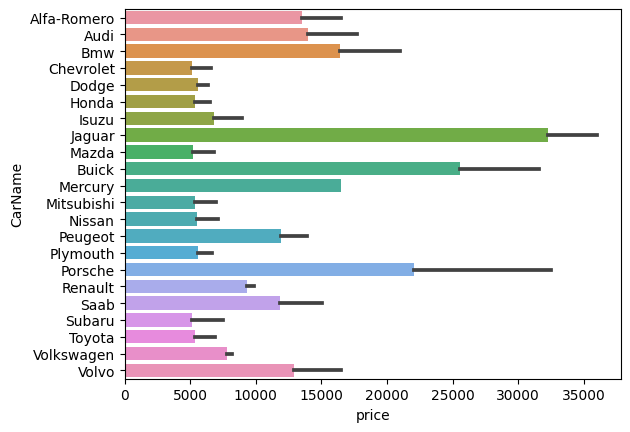

In [36]:
sns.barplot(data=df,y="CarName",x="price",estimator="min")

In [37]:
df["price"].value_counts()

price
8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: count, Length: 189, dtype: int64

In [38]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
#check only the a one column 
IQR = q3 - q1
IQR

8715.0

In [39]:
lower_boundary = q1 - (1.5 * IQR)
upper_boundary = q3 + (1.5 * IQR)

In [40]:
print(lower_boundary)
print(upper_boundary)

-5284.5
29575.5


In [41]:
df_without = df[df["price"] <= upper_boundary]

In [42]:
px.box(df_without,x="price")

In [43]:
q1 = df_without["price"].quantile(0.25)
q3 = df_without["price"].quantile(0.75)
#check only the a one column 
IQR = q3 - q1
IQR

7496.25

In [44]:
lower_boundary = q1 - (1.5 * IQR)
upper_boundary = q3 + (1.5 * IQR)
print(lower_boundary)
print(upper_boundary)

-3543.125
26441.875


In [45]:
df_without2 = df_without[df_without["price"] <= upper_boundary]

In [46]:
df_without2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
0,1,3,Alfa-Romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,27
1,2,3,Alfa-Romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,27
2,3,1,Alfa-Romero,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,26
3,4,2,Audi,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,30
4,5,2,Audi,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,Volvo,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,28
201,202,-1,Volvo,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,25
202,203,-1,Volvo,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,23
203,204,-1,Volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,27


In [47]:
px.box(df_without2,x="price")

In [48]:
X = df.drop("price",axis=1)
y = df["price"]

In [49]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# 5| Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6| Linear Regression

In [51]:
model = LinearRegression()

# 7| Fitting the model

In [52]:
model.fit(X_train,y_train)

LinearRegression()

# 8| Testing on test data

In [53]:
y_pred = model.predict(X_test)

# 9| Check the error and see if their is overfitting or underfitting

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Check for overfitting or underfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

if train_score > test_score:
    print("The model might be overfitting.")
elif train_score < test_score:
    print("The model might be underfitting.")
else:
    print("The model is fitting well.")

Mean Squared Error: 10823051.991405588
R^2 Score: 0.862902194861543
Training Score: 0.9739053081185483
Testing Score: 0.862902194861543
The model might be overfitting.


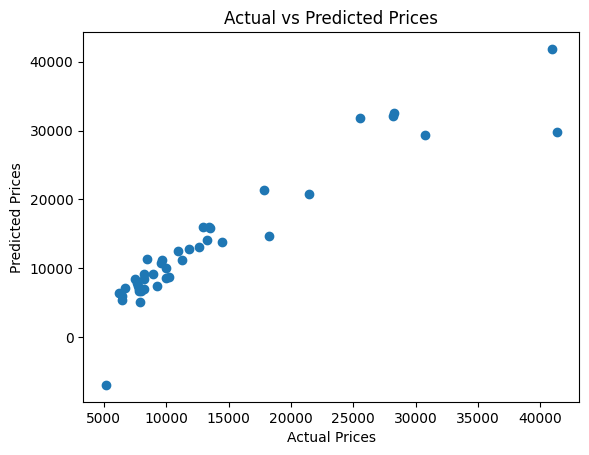

In [55]:
# Additional checks
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()